<a href="https://colab.research.google.com/github/saspav/DA-104/blob/main/%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B0_%D0%A1%D0%92_EDA_hh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA - разведочный анализ данных на собственных данных с hh.ru - Исследование ИТ направлений

In [1]:
import os
from time import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

In [2]:
df = pd.DataFrame()

path_file = r'D:\проект_стажировкa'
name_file = 'all_vacancies.csv'
file_csv = os.path.join(path_file, name_file)
if not os.access(file_csv, os.F_OK):
    path_file = ''
    file_csv = 'https://raw.githubusercontent.com/saspav/DA-104/main/dataset/all_vacancies.zip'
file_pkl = os.path.join(path_file, 'dataset_hh.pkl')
file_pickle = os.path.join(path_file, 'dataset_hh_prepared.pkl')
read_msg = lambda s: print(f'Читаю файл: {s}')

In [3]:
start_time = time()
if os.access(file_pkl, os.F_OK):
    read_msg(file_pkl)
    df = pd.read_pickle(file_pkl)
else:
    read_msg(file_csv)
    df = pd.read_csv(file_csv, sep=';')
print(f'Время выполнения: {time() - start_time} сек\n')

Читаю файл: dataset_hh.pkl
Время выполнения: 1.077711582183838 сек



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74719 entries, 0 to 74718
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  74719 non-null  int64 
 1   name                74719 non-null  object
 2   salary              50041 non-null  object
 3   employment          74573 non-null  object
 4   schedule            74719 non-null  object
 5   experience          74573 non-null  object
 6   key_skills          74573 non-null  object
 7   specializations     74573 non-null  object
 8   professional_roles  74573 non-null  object
 9   languages           74573 non-null  object
 10  description         74573 non-null  object
 11  area                74719 non-null  object
 12  employer            74719 non-null  object
 13  address             44226 non-null  object
 14  created_at          74719 non-null  object
 15  published_at        74719 non-null  object
 16  snippet             74

### В датасете 74719 объектов.

In [5]:
# посмотрим сколько пропусков
df.isna().sum()

id                        0
name                      0
salary                24678
employment              146
schedule                  0
experience              146
key_skills              146
specializations         146
professional_roles      146
languages               146
description             146
area                      0
employer                  0
address               30493
created_at                0
published_at              0
snippet                   0
url                   19485
dtype: int64

In [6]:
df.head()

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url
0,67381241,Junior бренд менеджер,NaN,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Английский язык'}, {'name': 'Управл...","[{'id': '3.206', 'name': 'Печатная реклама', '...","[{'id': '68', 'name': 'Менеджер по маркетингу ...",[],<strong>ЗАДАЧИ:</strong> <ul> <li>Эффективное ...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Москва', 'street': '1-й Дербеневский...",2022-06-30T16:34:21+0300,2022-06-30T16:34:21+0300,{'requirement': 'Высшее профессиональное (экон...,NaN
1,67392190,"Мерчендайзер, г. Пермь","{'from': None, 'to': 30000, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Выкладка товаров'}, {'name': 'Мерча...","[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '77', 'name': 'Мерчандайзер'}]",[],<p>В связи с активным развитием приглашаем в к...,"{'id': '72', 'name': 'Пермь', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Пермь', 'street': None, 'building': ...",2022-07-01T08:53:18+0300,2022-07-01T08:53:18+0300,{'requirement': 'Опыт работы мерчендайзером же...,NaN
2,67116363,Стажер в отдел внутренних коммуникаций,NaN,"{'id': 'probation', 'name': 'Стажировка'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Грамотная речь'}, {'name': 'Работа ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...","[{'id': '118', 'name': 'Специалист по подбору ...",[],<p><strong>Ищем стажера в команду внутренних к...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...",NaN,2022-06-23T11:58:13+0300,2022-06-23T11:58:13+0300,{'requirement': 'Иметь знания в областях: комм...,NaN
3,67706181,Территориальный менеджер,NaN,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Активные продажи'}, {'name': 'Обуче...","[{'id': '17.302', 'name': 'FMCG, Товары народн...","[{'id': '123', 'name': 'Супервайзер'}]",[],<strong>Обязанности:</strong> <ul> <li>Построе...,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Новосибирск', 'street': 'Бердское шо...",2022-07-12T15:09:15+0300,2022-07-12T15:09:15+0300,{'requirement': 'Опыт работы в продажах на рын...,NaN
4,67532563,Секретарь на ресепшен,"{'from': None, 'to': 50000, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Прием посетителей'}, {'name': 'Прие...","[{'id': '4.205', 'name': 'Персональный ассисте...","[{'id': '110', 'name': 'Секретарь, помощник ру...",[],<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Москва', 'street': '1-й Дербеневский...",2022-07-06T11:22:07+0300,2022-07-06T11:22:07+0300,{'requirement': 'Аналогичный опыт работы от 1 ...,NaN


Теперь другое дело. И сохраним датафрейм в формате pickle для ускорение чтения и записи данных

In [7]:
if not os.access(file_pkl, os.F_OK):
    df.to_pickle(file_pkl)

In [8]:
start_time = time()
df = pd.read_pickle(file_pkl)
print(f'Время выполнения: {time() - start_time} сек\n')

Время выполнения: 1.0361106395721436 сек



Время чтения данных уменьшилось в десять раз!

Продолжим исследование датасета

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74719 entries, 0 to 74718
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  74719 non-null  int64 
 1   name                74719 non-null  object
 2   salary              50041 non-null  object
 3   employment          74573 non-null  object
 4   schedule            74719 non-null  object
 5   experience          74573 non-null  object
 6   key_skills          74573 non-null  object
 7   specializations     74573 non-null  object
 8   professional_roles  74573 non-null  object
 9   languages           74573 non-null  object
 10  description         74573 non-null  object
 11  area                74719 non-null  object
 12  employer            74719 non-null  object
 13  address             44226 non-null  object
 14  created_at          74719 non-null  object
 15  published_at        74719 non-null  object
 16  snippet             74

In [10]:
df.head(7)

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url
0,67381241,Junior бренд менеджер,NaN,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Английский язык'}, {'name': 'Управл...","[{'id': '3.206', 'name': 'Печатная реклама', '...","[{'id': '68', 'name': 'Менеджер по маркетингу ...",[],<strong>ЗАДАЧИ:</strong> <ul> <li>Эффективное ...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Москва', 'street': '1-й Дербеневский...",2022-06-30T16:34:21+0300,2022-06-30T16:34:21+0300,{'requirement': 'Высшее профессиональное (экон...,NaN
1,67392190,"Мерчендайзер, г. Пермь","{'from': None, 'to': 30000, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Выкладка товаров'}, {'name': 'Мерча...","[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '77', 'name': 'Мерчандайзер'}]",[],<p>В связи с активным развитием приглашаем в к...,"{'id': '72', 'name': 'Пермь', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Пермь', 'street': None, 'building': ...",2022-07-01T08:53:18+0300,2022-07-01T08:53:18+0300,{'requirement': 'Опыт работы мерчендайзером же...,NaN
2,67116363,Стажер в отдел внутренних коммуникаций,NaN,"{'id': 'probation', 'name': 'Стажировка'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Грамотная речь'}, {'name': 'Работа ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...","[{'id': '118', 'name': 'Специалист по подбору ...",[],<p><strong>Ищем стажера в команду внутренних к...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...",NaN,2022-06-23T11:58:13+0300,2022-06-23T11:58:13+0300,{'requirement': 'Иметь знания в областях: комм...,NaN
3,67706181,Территориальный менеджер,NaN,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Активные продажи'}, {'name': 'Обуче...","[{'id': '17.302', 'name': 'FMCG, Товары народн...","[{'id': '123', 'name': 'Супервайзер'}]",[],<strong>Обязанности:</strong> <ul> <li>Построе...,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Новосибирск', 'street': 'Бердское шо...",2022-07-12T15:09:15+0300,2022-07-12T15:09:15+0300,{'requirement': 'Опыт работы в продажах на рын...,NaN
4,67532563,Секретарь на ресепшен,"{'from': None, 'to': 50000, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Прием посетителей'}, {'name': 'Прие...","[{'id': '4.205', 'name': 'Персональный ассисте...","[{'id': '110', 'name': 'Секретарь, помощник ру...",[],<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Москва', 'street': '1-й Дербеневский...",2022-07-06T11:22:07+0300,2022-07-06T11:22:07+0300,{'requirement': 'Аналогичный опыт работы от 1 ...,NaN
5,52415794,Оператор линии розлива,"{'from': 30000, 'to': None, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'shift', 'name': 'Сменный график'}","{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '29.588', 'name': 'Другое', 'profarea_...","[{'id': '85', 'name': 'Оператор производственн...",[],<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': '58', 'name': 'Липецк', 'url': 'https:/...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Липецк', 'street': 'Универсальный пр...",2022-06-29T10:16:34+0300

In [11]:
def is_null(item):
    if pd.isna(item):
        return True
    item = item.strip()
    if not item or item in ('[]',):
        return True
    return False


def marking_nan(item):
    if is_null(item):
        return np.NaN
    return item

In [12]:
# если значение ячейки пустое --> запишем в неё NaN
for name_col in df.columns:
    if pd.api.types.is_string_dtype(df[name_col]):
        df[name_col] = df[name_col].map(marking_nan)

# посмотрим сколько пропусков
df.isna().sum()        

id                        0
name                      0
salary                24678
employment              146
schedule                  0
experience              146
key_skills            20111
specializations         146
professional_roles      146
languages             71976
description             146
area                      0
employer                  0
address               30493
created_at                0
published_at              0
snippet                   0
url                   19485
dtype: int64

#### Поработаем с колонкой *name*

In [13]:
# переведем в нижний регистр
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.replace('1c', '1с')
df['name'] = df['name'].str.replace('ведущий ', '')
df['name'] = df['name'].str.replace('тестировщик (асессор)', 'асессор-тестировщик')
df['name'] = df['name'].str.replace('руководитель проектов', 'руководитель проекта')
# выделим ту часть, что в скобках
df['name_parts'] = df['name'].str.split('(')
df['name_part1'] = df['name_parts'].apply(lambda x: x[0].strip())
df['name_part2'] = df['name_parts'].apply(lambda x: x[1].strip(')') if len(x) > 1 else np.NaN)
df.drop('name_parts', axis=1, inplace=True)

Посмотрим на вторую часть колонки "name"

In [14]:
show_cols = ['name', 'name_part1', 'name_part2']
df[~(df['name_part2'].isna())][show_cols]

,name,name_part1,name_part2
7,менеджер по работе с ключевыми клиентами (lкам),менеджер по работе с ключевыми клиентами,lкам
16,"мерчендайзер, краснодар (район ул. зиповская-у...","мерчендайзер, краснодар","район ул. зиповская-ул. 40 лет победы, ул. кра..."
24,менеджер по работе с сетевыми клиентами (кам),менеджер по работе с сетевыми клиентами,кам
37,"специалист отдела от,го,чс и экологии (питьева...","специалист отдела от,го,чс и экологии",питьевая вода
40,стационарный мерчендайзер (фрунзенский район),стационарный мерчендайзер,фрунзенский район
...,...,...,...
74706,старший юрист / юрист (налоговое право),старший юрист / юрист,налоговое право
74707,менеджер по привлечению клиентов (микробизнес),менеджер по привлечению клиентов,микробизнес
74710,бармен (м.университет),бармен,м.университет
74715,инженер (п.241),инженер,п.241


Видно, что в скобках записывали в основном комментарии

In [15]:
df['name_part2'].value_counts()

удаленно                                     465
бьюти-эксперт)                               116
подработка                                    85
удалённо                                      77
тц мега                                       74
                                            ... 
ст.м. бунинская аллея, тц бутово молл          1
ст.м. говорово, тц наш                         1
ст.м. московская, тц лето                      1
ст. м алма-атинская тц парк-хаус братеево      1
п.241                                          1
Name: name_part2, Length: 11072, dtype: int64

In [16]:
# преобразование строки в словарь или список словарей

from ast import literal_eval


STAPLES = {'{': '}', '[': ']'}


def get_item_from_dict(cell_text, key_name='name'):
    value = np.NaN
    if not pd.isna(cell_text):
        cell_text = cell_text.strip()
        ch_fst = cell_text[0]
        ch_lst = cell_text[-1]
        # открывающая и закрывающая скобки должны быть и быть одинаковыми
        if ch_fst in STAPLES.keys() and ch_lst == STAPLES[ch_fst]:
            result = literal_eval(cell_text)
            if isinstance(result, dict):
                value = result.get(key_name, np.NaN)
            elif isinstance(result, list):
                values = []
                for item in result:
                    value = item.get(key_name, np.NaN)
                    if not pd.isna(value):
                        values.append(value)
                if values:
                    return sorted(values)
    return value


def make_str_lower(item):
    if isinstance(item, list):
        return tuple([s.lower() for s in item])
    return item

In [17]:
# salary поделить на 2 части мин и мах оклад,
# учесть при gross = True это без вычета налогов,
# т.е если False --> умножить на 1.13

def get_salary(cell_text):
    value_from = get_item_from_dict(cell_text, 'from')
    value_to = get_item_from_dict(cell_text, 'to')
#     if pd.isna(value_from) or not value_from:
#         value_from = value_to
#     if pd.isna(value_to) or not value_to:
#         value_to = value_from
    gross = get_item_from_dict(cell_text, 'gross')
    # если это чистый доход, т.е. с учетом налогов --> умножим на 13%
    if not gross:
        if value_from:
            value_from = round(value_from * 1.13)
        if value_to:
            value_to = round(value_to * 1.13)
    return value_from, value_to


df['salary_min'] = df['salary'].map(get_salary)
df['salary_max'] = df['salary_min'].apply(lambda x: x[1])
df['salary_min'] = df['salary_min'].apply(lambda x: x[0])

In [18]:
# посмотрим на пропуски в датах
df[(df.published_at.isna()) | (df.created_at.isna())]

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url,name_part1,name_part2,salary_min,salary_max


In [19]:
# published_at, created_at преобразовать в datetime # 2022-03-29T15:37:33+0300
# заполним пропуски в published_at данными из created_at
df.published_at = df.apply(lambda row: row.created_at if pd.isna(row.published_at) else row.published_at, axis=1)
for col in ('published_at', 'created_at'):
    df.dropna(subset=[col], inplace=True)
    # выделим строку с датой
    df[col] = df[col].str.findall( r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}')
    df[col] = df[col].apply(lambda s: s[0] if s else np.NaN)
    df.dropna(subset=[col], inplace=True)
    # преобразуем в формат datetime
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S')

### Преобразуем значения в остальных колонках из словарей в читаемые поля

In [20]:
convert_columns = ('area', 'type', 'employer', 'schedule', 'experience',
                   'key_skills', 'specializations', 'professional_roles',
                   'languages')
for name_col in convert_columns:
    if name_col in df.columns:
        print(f'Обрабатываю колонку {name_col}')
        if name_col in ('specializations', 'professional_roles'):
            df[f'{name_col}_id'] = df[name_col].apply(
                lambda x: get_item_from_dict(x, key_name='id'))
        df[f'{name_col}_name'] = df[name_col].map(get_item_from_dict)
        if name_col in ('key_skills', 'specializations', 'professional_roles', 'languages'):
            df[f'{name_col}_name'] = df[f'{name_col}_name'].map(make_str_lower)

# name_col = 'snippet'
# names = ('requirement', 'responsibility')
# for name_key in names:
#     df[f'{name_key}_name'] = df[name_col].apply(
#         lambda x: get_item_from_dict(x, name_key))

for name_col in ('professional_roles_id', 'professional_roles_name'):
    if name_col in df.columns:
        df[name_col] = df[name_col].apply(
            lambda x: x[0] if isinstance(x, (tuple, list, set)) and x else x)          

Обрабатываю колонку area
Обрабатываю колонку employer
Обрабатываю колонку schedule
Обрабатываю колонку experience
Обрабатываю колонку key_skills
Обрабатываю колонку specializations
Обрабатываю колонку professional_roles
Обрабатываю колонку languages


In [21]:
df.head(7)

,id,name,salary,employment,schedule,experience,key_skills,specializations,professional_roles,languages,description,area,employer,address,created_at,published_at,snippet,url,name_part1,name_part2,salary_min,salary_max,area_name,employer_name,schedule_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
0,67381241,junior бренд менеджер,NaN,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Английский язык'}, {'name': 'Управл...","[{'id': '3.206', 'name': 'Печатная реклама', '...","[{'id': '68', 'name': 'Менеджер по маркетингу ...",NaN,<strong>ЗАДАЧИ:</strong> <ul> <li>Эффективное ...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Москва', 'street': '1-й Дербеневский...",2022-06-30 16:34:21,2022-06-30 16:34:21,{'requirement': 'Высшее профессиональное (экон...,NaN,junior бренд менеджер,NaN,NaN,NaN,Москва,ИДС Боржоми,Полный день,От 1 года до 3 лет,"(ms powerpoint, английский язык, маркетинговый...","[3.166, 3.206, 3.209, 3.230, 3.8]","(pr, маркетинговые коммуникации, наружная рекл...",68,менеджер по маркетингу и рекламе,NaN
1,67392190,"мерчендайзер, г. пермь","{'from': None, 'to': 30000, 'currency': 'RUR',...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Выкладка товаров'}, {'name': 'Мерча...","[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '77', 'name': 'Мерчандайзер'}]",NaN,<p>В связи с активным развитием приглашаем в к...,"{'id': '72', 'name': 'Пермь', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Пермь', 'street': None, 'building': ...",2022-07-01 08:53:18,2022-07-01 08:53:18,{'requirement': 'Опыт работы мерчендайзером же...,NaN,"мерчендайзер, г. пермь",NaN,NaN,33900.0,Пермь,ИДС Боржоми,Полный день,Нет опыта,"(блочная выкладка товара, выкладка товаров, ме...","[17.196, 17.231, 17.256, 17.66, 3.151]","(дистрибуция, мерчендайзинг, оптовая торговля,...",77,мерчандайзер,NaN
2,67116363,стажер в отдел внутренних коммуникаций,NaN,"{'id': 'probation', 'name': 'Стажировка'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Грамотная речь'}, {'name': 'Работа ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...","[{'id': '118', 'name': 'Специалист по подбору ...",NaN,<p><strong>Ищем стажера в команду внутренних к...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...",NaN,2022-06-23 11:58:13,2022-06-23 11:58:13,{'requirement': 'Иметь знания в областях: комм...,NaN,стажер в отдел внутренних коммуникаций,NaN,NaN,NaN,Москва,ИДС Боржоми,Полный день,Нет опыта,"(ms powerpoint, грамотная речь, деловое общени...","[6.184, 6.247, 6.254, 6.319]","(начальный уровень, мало опыта, развитие персо...",118,специалист по подбору персонала,NaN
3,67706181,территориальный менеджер,NaN,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Активные продажи'}, {'name': 'Обуче...","[{'id': '17.302', 'name': 'FMCG, Товары народн...","[{'id': '123', 'name': 'Супервайзер'}]",NaN,<strong>Обязанности:</strong> <ul> <li>Построе...,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'id': '6', 'name': 'ИДС Боржоми', 'url': 'htt...","{'city': 'Новосибирск', 'street': 'Бердское шо...",2022-07-12 15:09:15,2022-07-12 15:09:15,{'requirement': 'Опыт работы в продажах на рын...,NaN,территориальный менеджер,NaN,NaN,NaN,Новосибирск,ИДС Боржоми,Полный день,От 1 года до 3 лет,"(активные продажи, анализ продаж, ведение отче...","[17.149, 17.196, 17.231, 17.302, 17.324]","(fmcg, товары народного потребления, менеджер ...",123,супервайзер,NaN
4,67532563,секретарь на ресепшен,"{'from

### Уберем из анализа неинформативные колонки и проведем неграфический анализ данных:  посмотрим на частоту встречаемости значений ТОП-10 в списке

In [22]:
df['name_part1'].value_counts()[:20]

продавец-консультант                             2780
продавец-кассир                                  1203
менеджер по продажам                              952
торговый представитель                            614
продавец                                          572
кладовщик                                         556
менеджер по работе с клиентами                    494
кассир                                            359
бухгалтер                                         307
мерчендайзер                                      306
повар                                             284
товаровед-оценщик ломбарда sunlight / санлайт     269
начинающий специалист                             268
водитель-курьер на личном автомобиле              265
грузчик                                           250
водитель-экспедитор                               249
комплектовщик                                     240
оператор call-центра                              232
специалист по работе с клиен

In [23]:
# df.to_csv(os.path.join(hh_obj.path_file, 'vacancies.csv'), sep=';', index=False)

show_columns = [col for idx, col in enumerate(df.columns) if
                0 < idx < 5 or col.endswith('name') or '_part' in col]
for name_col in show_columns:
    print(f'Признак: "{name_col}", '
          f'количество уникальных значений {df[name_col].nunique()}')
#     print(df[name_col].value_counts()[:10])
#     print()

Признак: "name", количество уникальных значений 38244
Признак: "salary", количество уникальных значений 5977
Признак: "employment", количество уникальных значений 5
Признак: "schedule", количество уникальных значений 5
Признак: "name_part1", количество уникальных значений 24658
Признак: "name_part2", количество уникальных значений 11072
Признак: "area_name", количество уникальных значений 1717
Признак: "employer_name", количество уникальных значений 5227
Признак: "schedule_name", количество уникальных значений 5
Признак: "experience_name", количество уникальных значений 4
Признак: "key_skills_name", количество уникальных значений 34107
Признак: "specializations_name", количество уникальных значений 703
Признак: "professional_roles_name", количество уникальных значений 146
Признак: "languages_name", количество уникальных значений 27


In [24]:
# заполним пропуски как 'Нет опыта'
df.experience_name.fillna('Нет опыта', inplace=True)

used_columns = ['id', 'name', 'name_part1', 'name_part2',
                'salary_min', 'salary_max', 'salary_avg', 'currency',
                'published_at', 'employer_name', 'area_name',
                'experience_name', 'key_skills_name',
                'specializations_id', 'specializations_name',
                'professional_roles_id', 'professional_roles_name',
                'languages_name']

used_columns = [column for column in used_columns if column in df.columns]
dfp = df[used_columns]
dfp.to_pickle(file_pickle)
dfp.to_csv(file_pickle.replace('.pkl', '.csv'), sep=';', index=False)

In [25]:
# обработка в hh_processing_after.py
file_csv = os.path.join(path_file, 'vacancies_prepared_hh.csv')
if not os.access(file_csv, os.F_OK):
    path_file = ''
    file_csv = 'https://raw.githubusercontent.com/saspav/DA-104/main/dataset/vacancies_prepared_hh.zip'
dfp = pd.read_csv(file_csv, sep=';')
cols = 'key_skills_name;specializations_id;specializations_name;languages_name'.split(';')
for col in cols:
    dfp[col] = dfp[col].str.split(':')

In [26]:
dfs = pd.DataFrame(columns=['Оклад, руб.', 'Зарплата'])
salaries = {'salary_min': 'Мин.', 'salary_max': 'Макс.'}
for salary in salaries:
    min_salary = dfp[salary].quantile(0.005)
    max_salary = dfp[salary].quantile(0.995)
    print(f'Признак: {salary}, нижний порог={min_salary}, '
          f'верхний порог={max_salary}')
    outlers_salary = (dfp[salary] < min_salary) | (dfp[salary] > max_salary)
    dfp.loc[outlers_salary, salary] = np.NaN
    tmp = dfp[[salary, 'name']]
    tmp.columns = dfs.columns
    tmp.loc[:, 'Зарплата'] = salaries[salary]
    dfs = pd.concat([dfs, tmp], axis=0, ignore_index=True)

Признак: salary_min, нижний порог=17241.0, верхний порог=280225.3999999999
Признак: salary_max, нижний порог=24804.0, верхний порог=402299.0


In [27]:
dfp.sample(7)

,id,name,name_part1,name_part2,salary_min,salary_max,salary_avg,published_at,employer_name,area_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
5521,67162455,руководитель проекта ит,руководитель проекта ит,NaN,NaN,NaN,NaN,2022-06-24 14:08:22,Национальный исследовательский университет Выс...,Москва,От 1 года до 3 лет,"[agile, agile project management, atlassian co...","[1.327, 1.89]","[информационные технологии, управление проектами]",104,руководитель группы разработки,NaN
5274,67510239,системный администратор (долгопрудный),системный администратор,долгопрудный,82758.0,103448.0,93103.0,2022-07-05 16:30:40,"Мистерия, промышленно-торговая группа",Москва,От 3 до 6 лет,[системный администратор],"[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",113,системный администратор,NaN
6396,55297277,devops инженер,devops инженер,NaN,NaN,NaN,NaN,2022-07-08 17:07:59,Центральный банк Российской Федерации,Казань,От 1 года до 3 лет,"[apache http server, apache maven, apache tomc...","[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",114,системный инженер,NaN
2950,67286574,devops - специалист,devops - специалист,NaN,NaN,NaN,NaN,2022-06-28 12:23:41,ФИНАМ,Москва,От 1 года до 3 лет,"[bash, ci/cd, docker, elk, git, powershell, py...","[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",113,системный администратор,NaN
781,67264027,1с разработчик,1с разработчик,NaN,NaN,NaN,NaN,2022-07-05 09:22:45,РОСБАНК,Москва,От 1 года до 3 лет,"[1с программирование, 1с, бухгалтерия, 1с, п...","[1.10, 1.221, 1.50, 1.82, 1.9]","[web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",NaN
518,67548957,оператор 1-й линии технической поддержки,оператор 1-й линии технической поддержки,NaN,68966.0,68966.0,68966.0,2022-07-06 17:05:03,Mr.Doors,Москва,От 1 года до 3 лет,"[helpdesk, грамотная речь, грамотность, консул...","[1.172, 1.211, 1.273, 1.82, 1.89]","[инженер, интернет, начальный уровень, мало оп...",121,специалист технической поддержки,NaN
3654,52831907,qa automation engineer,qa automation engineer,NaN,NaN,NaN,NaN,2022-06-29 10:21:37,Т1 Интеграция,Москва,От 1 года до 3 лет,"[api, allure, atlassian jira, cucumber, git, i...","[1.117, 1.221, 1.82]","[инженер, программирование, разработка, тестир...",124,тестировщик,NaN


In [28]:
dfp[[col for col in dfp.columns if col.startswith('salary')]].describe().round()

,salary_min,salary_max,salary_avg
count,2083.0,2092.0,2103.0
mean,92117.0,120847.0,106623.0
std,57366.0,78811.0,68217.0
min,17241.0,25000.0,15000.0
25%,48000.0,60000.0,54598.0
50%,73564.0,93391.0,85000.0
75%,117701.0,160920.0,140000.0
max,280000.0,402299.0,362069.0


#### Медианная зарплата равна 85 тысяч. Средняя зарплата 106 тысяч - это за счет наличия выбросов в большую сторону.

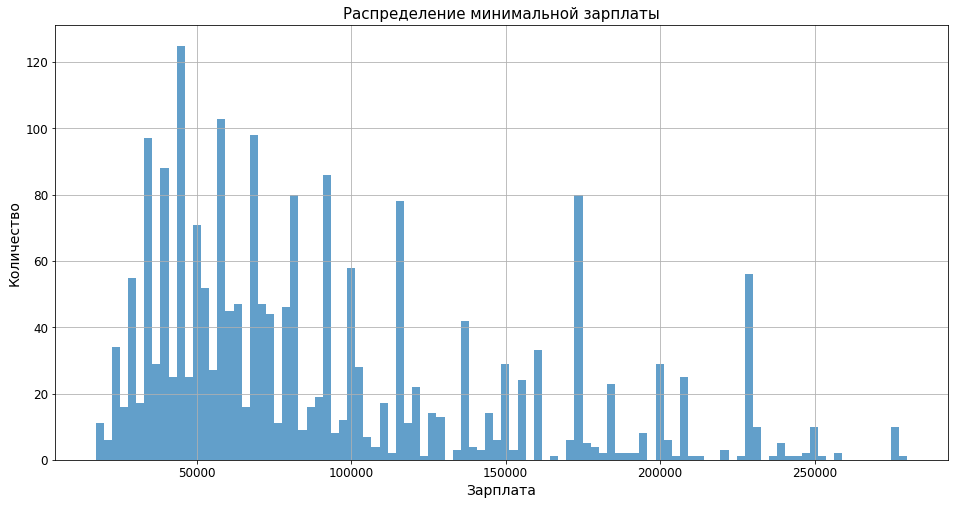

In [44]:
dfp['salary_min'].hist(bins=100, figsize=(16, 8), alpha=0.7)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение минимальной зарплаты')
plt.show()

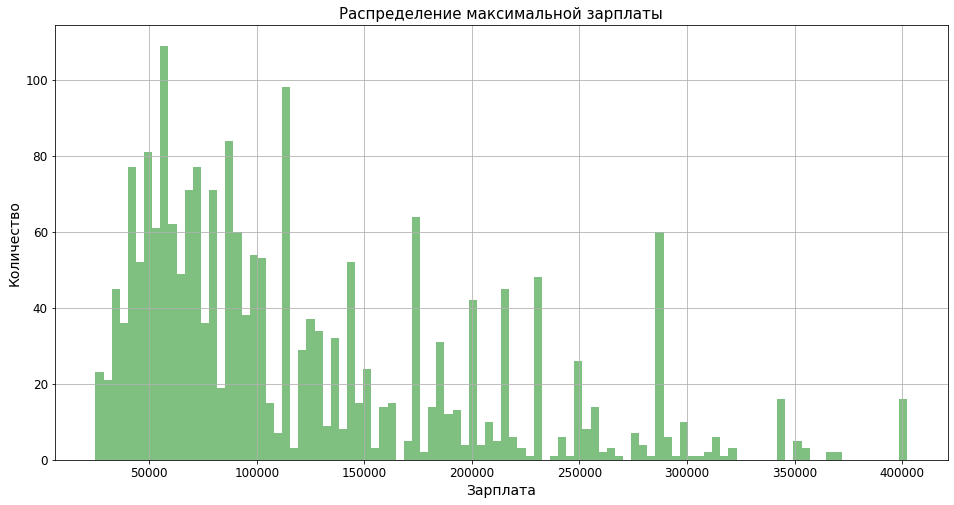

In [45]:
dfp['salary_max'].hist(bins=100, figsize = (16, 8), color='g', alpha=0.5)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение максимальной зарплаты')
plt.show()

#### Посмотрим на зарплаты по другому

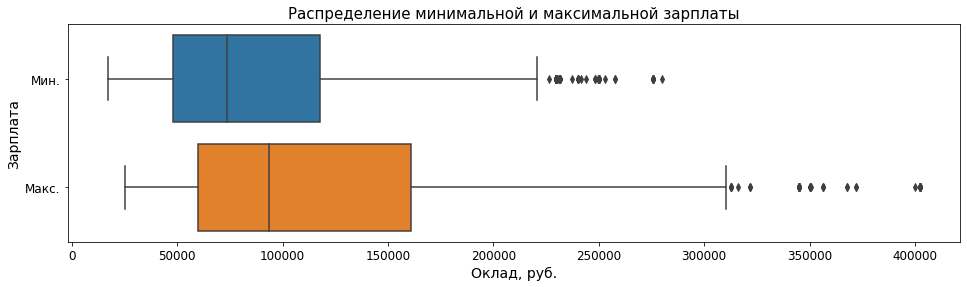

In [31]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='Оклад, руб.', y='Зарплата', data=dfs, ax=ax)
plt.title('Распределение минимальной и максимальной зарплаты')
plt.show()

#### Неграфический анализ категориальных данных приведен выше, на этапе исследования колонок на предмет информативности. 
#### Для отобранных колонок проведем графический анализ ТОП-20 признаков


In [32]:
def values_to_dfp(col_name):
    return pd.DataFrame(pd.core.common.flatten(dfp[f'{col_name}_name'].dropna().tolist()), columns=[col_name])

# создадим ДФ из ключевых навыков
dfp_sk = values_to_dfp('key_skills')

# создадим ДФ из специализаций
dfp_sp = values_to_dfp('specializations')

In [33]:
# ТОП-10 вакансий
dfp['name_part1'].value_counts()[:20]

системный администратор                      259
программист 1с                               218
сервисный инженер                            125
руководитель проекта                          97
специалист технической поддержки              80
инженер технической поддержки                 66
frontend-разработчик                          65
механик                                       60
java-разработчик                              57
разработчик 1с                                46
инженер-программист                           45
инженер-механик                               42
специалист по информационной безопасности     39
программист                                   38
qa engineer                                   35
middle                                        33
разработчик                                   32
инженер                                       31
технический писатель                          31
devops инженер                                31
Name: name_part1, dt

In [34]:
# ТОП-10 навыков
dfp_sk.key_skills.value_counts()[:20]

1с                             1039
sql                            1034
linux                           859
git                             704
python                          589
английский язык                 567
postgresql                      518
java                            516
управление проектами            478
работа в команде                460
javascript                      411
техническое обслуживание        397
ms sql                          334
информационные технологии       331
1с программирование             322
информационная безопасность     305
docker                          296
настройка пк                    295
грамотная речь                  265
c#                              263
Name: key_skills, dtype: int64

In [35]:
# ТОП-10 специализаций
dfp_sp.specializations.value_counts()[:20]

инженер                                  6115
программирование, разработка             3863
системы управления предприятием (erp)    3096
web инженер                              2597
web мастер                               2593
поддержка, helpdesk                      2162
системный администратор                  2159
интернет                                 1669
сетевые технологии                       1530
управление проектами                      986
телекоммуникации                          936
сервисный инженер                         933
инсталляция и настройка оборудования      933
монтажник                                 932
начальный уровень, мало опыта             648
компьютерная безопасность                 521
тестирование                              418
игровое по                                261
дизайн, графика, живопись                 261
информационные технологии                 246
Name: specializations, dtype: int64

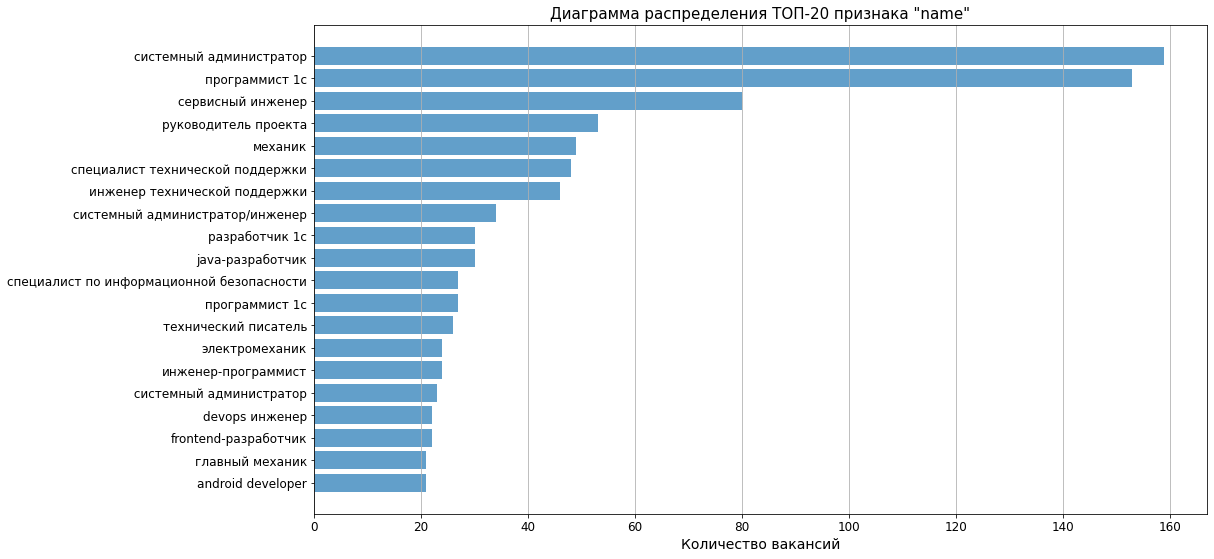

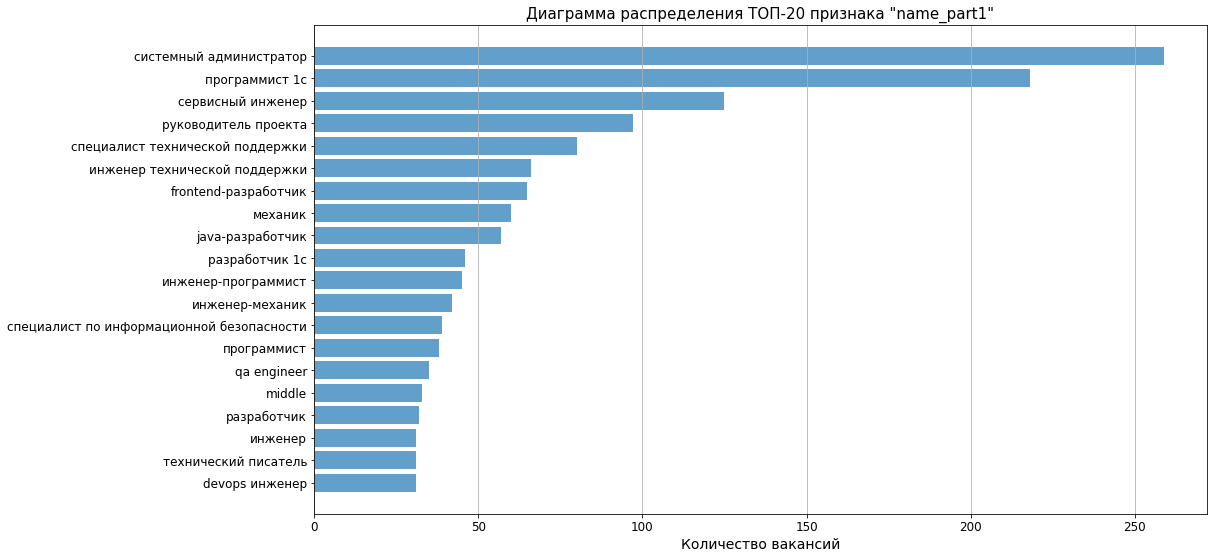

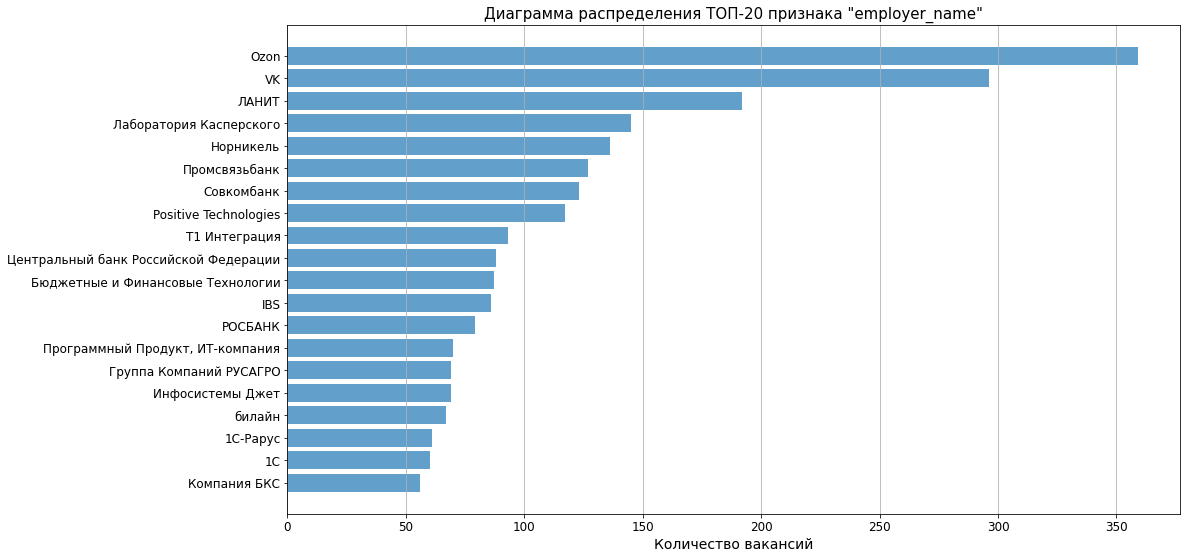

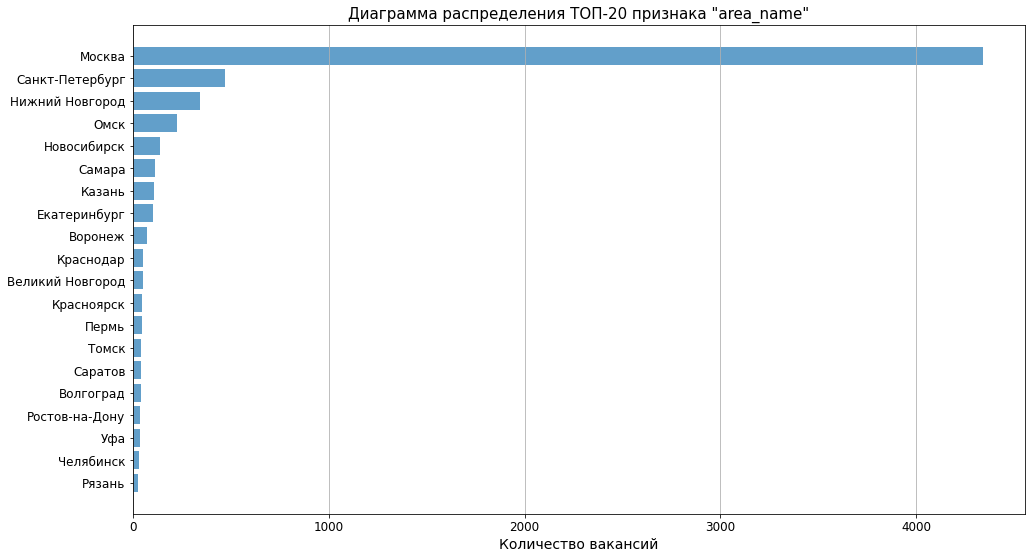

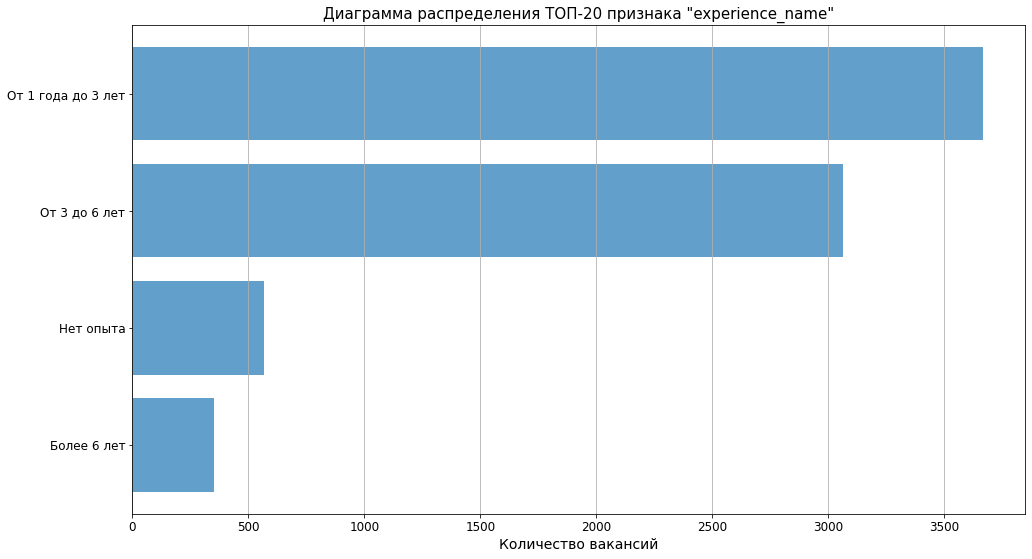

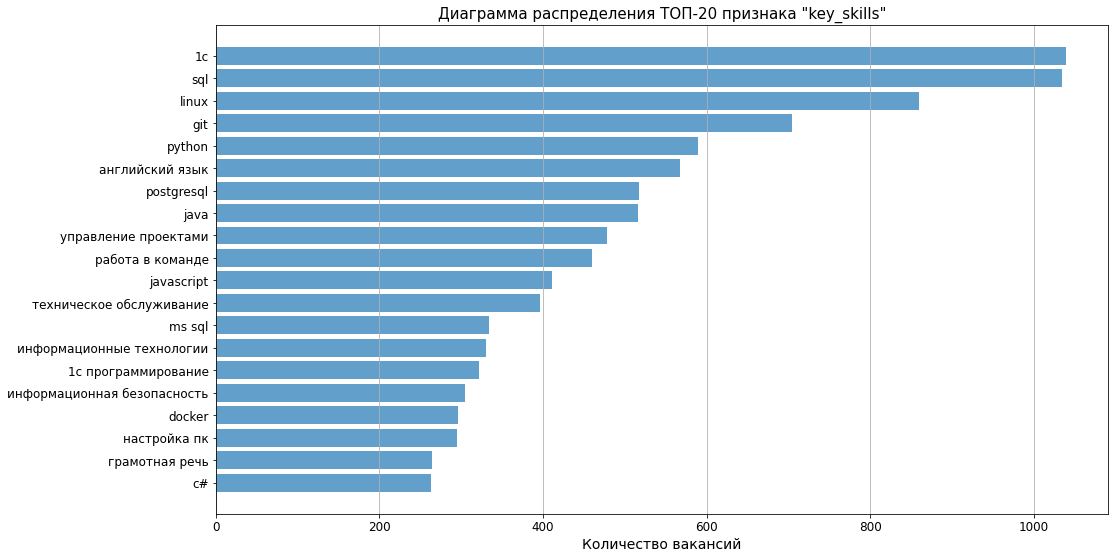

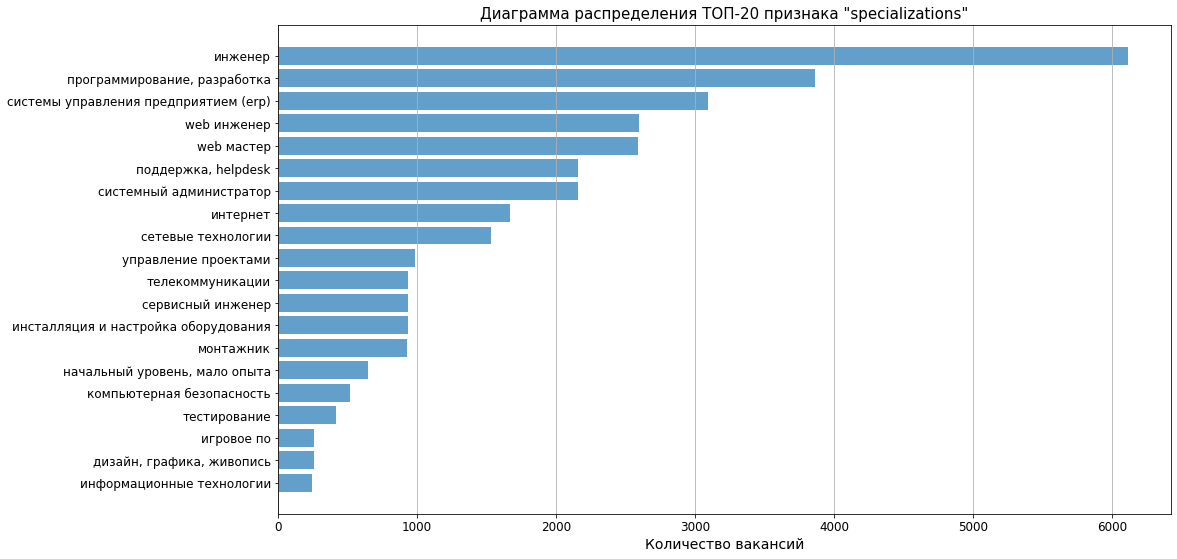

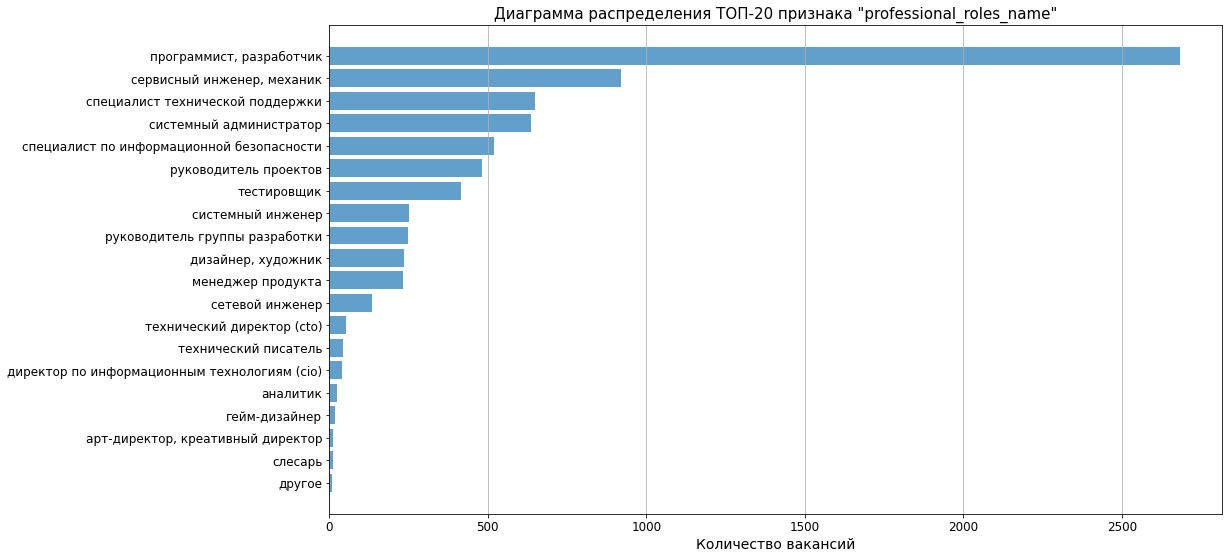

In [36]:
def show_barh(dataset, column_name):
    show_counts = dataset[column_name].value_counts()[:20][::-1]
    fig, ax = plt.subplots(figsize=(16, 9))
    plt.barh(show_counts.index, show_counts.values, alpha=0.7)
    plt.grid(axis='x')
    plt.title(f'Диаграмма распределения ТОП-20 признака "{name_col}"')
    plt.xlabel('Количество вакансий')
    plt.show()


graph_columns = ['name', 'name_part1', 'employer_name', 'area_name',
                 'experience_name', 'key_skills', 'specializations', 'professional_roles_name']
for name_col in graph_columns:
    if name_col == 'key_skills':
        show_barh(dfp_sk, name_col)
    elif name_col == 'specializations':
        show_barh(dfp_sp, name_col)
    else:
        show_barh(dfp, name_col)

Удаление из признака "name" второй части в скобках принесло пользу, количество вакансий увеличилось и некоторые изменили свой рейтинг.            

#### Проанализируем взаимосвязь категориальных колонок с числовыми
Из числовых колонок в датасете есть только миниальная и максимальная зарплата.

Посмотрим связь начальной зарплаты с ТОП-10 вакансий по специальностям.


In [37]:
names = dfp['name_part1'].value_counts()[:10].index
vacancies = dfp[dfp['name_part1'].isin(names)]
vacancies.head()

,id,name,name_part1,name_part2,salary_min,salary_max,salary_avg,published_at,employer_name,area_name,experience_name,key_skills_name,specializations_id,specializations_name,professional_roles_id,professional_roles_name,languages_name
5,55313006,системный администратор,системный администратор,NaN,40230.0,50288.0,45259.0,2022-07-11 10:45:58,WiseAdvice,Волжский (Волгоградская область),От 1 года до 3 лет,NaN,"[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",113,системный администратор,NaN
13,67342349,программист 1с,программист 1с,NaN,NaN,NaN,NaN,2022-07-11 08:29:44,WiseAdvice,Ульяновск,От 1 года до 3 лет,"[1с программирование, 1с, бухгалтерия, 1с, з...","[1.10, 1.221, 1.50, 1.82, 1.9]","[web инженер, web мастер, инженер, программиро...",96,"программист, разработчик",NaN
14,55854019,системный администратор,системный администратор,NaN,40230.0,50288.0,45259.0,2022-07-06 10:40:00,WiseAdvice,Волгоград,От 1 года до 3 лет,NaN,"[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",113,системный администратор,NaN
16,66198782,системный администратор,системный администратор,NaN,NaN,NaN,NaN,2022-07-04 11:24:15,Хлебный дом,Санкт-Петербург,От 1 года до 3 лет,"[active directory, powershell, windows 7, мног...","[1.172, 1.211, 1.273, 1.82, 1.89]","[инженер, интернет, начальный уровень, мало оп...",121,специалист технической поддержки,NaN
18,67330300,системный администратор,системный администратор,NaN,91954.0,114942.0,103448.0,2022-06-29 10:53:34,Акрон,Апатиты,От 1 года до 3 лет,"[администрирование сетевого оборудования, наст...","[1.211, 1.270, 1.273, 1.82, 1.89]","[инженер, интернет, поддержка, helpdesk, сетев...",113,системный администратор,NaN


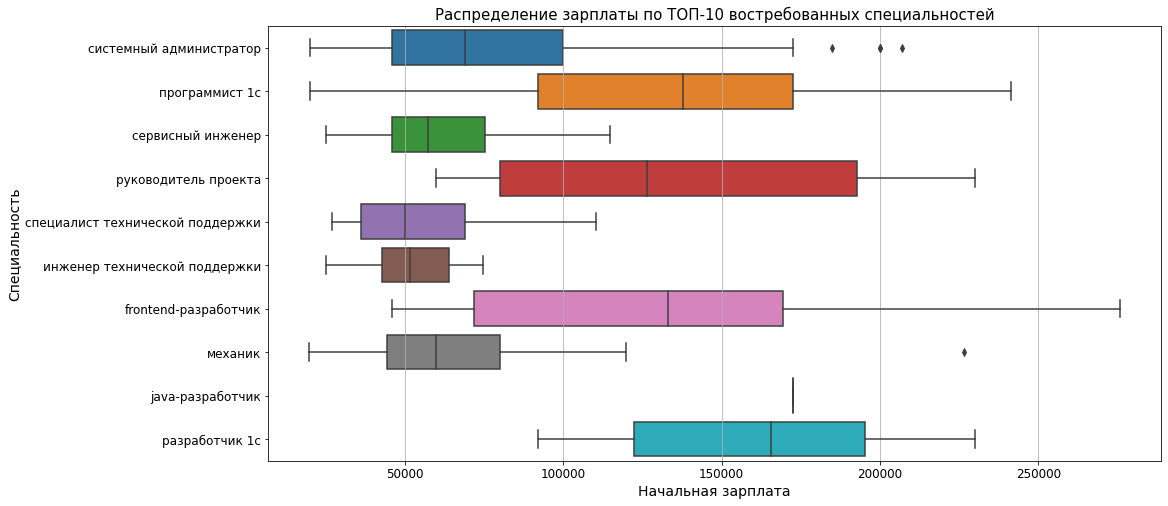

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='name_part1', x='salary_min', data=vacancies, order=names, ax=ax)
plt.title('Распределение зарплаты по ТОП-10 востребованных специальностей')
plt.xlabel('Начальная зарплата')
plt.ylabel('Cпециальность')
plt.grid(axis='x')
plt.show()

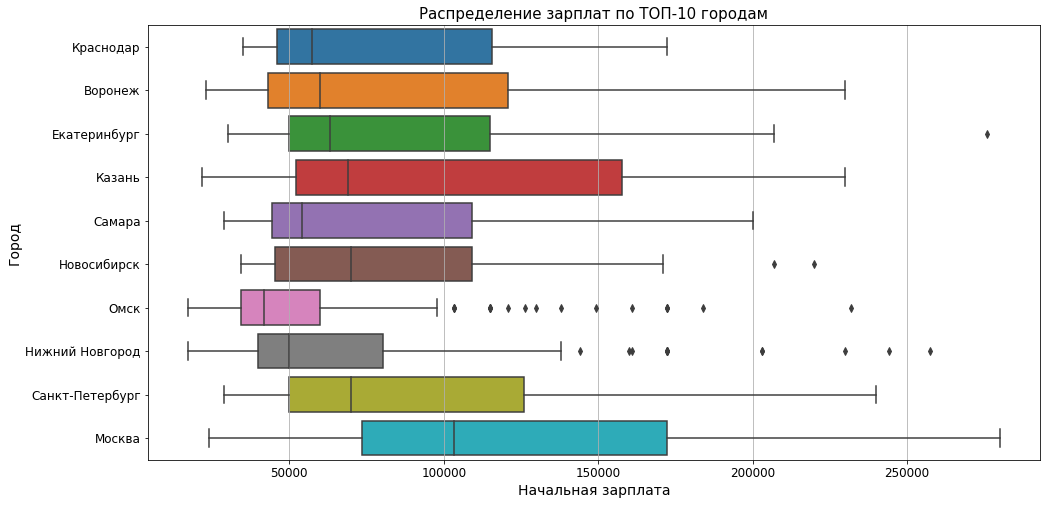

In [39]:
areas_names = dfp['area_name'].value_counts()[:10].index
areas = dfp[dfp['area_name'].isin(areas_names)]
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='area_name', x='salary_min', data=areas, order=areas_names[::-1], ax=ax)
plt.title('Распределение зарплат по ТОП-10 городам')
plt.xlabel('Начальная зарплата')
plt.ylabel('Город')
plt.grid(axis='x')
plt.show()

По графикам видно, что самая востребованная специальность: разработчик 1с имеет медианную зарплату чуть выше программист 1С. Так же видна тенденция по возрастанию зарплаты в зависимости от количества поданных вакансий, с наибольшими зарплатами в Москве и Санкт-Петербурге.
#### Посмотрим распределение зарплаты от желаемого опыта работы

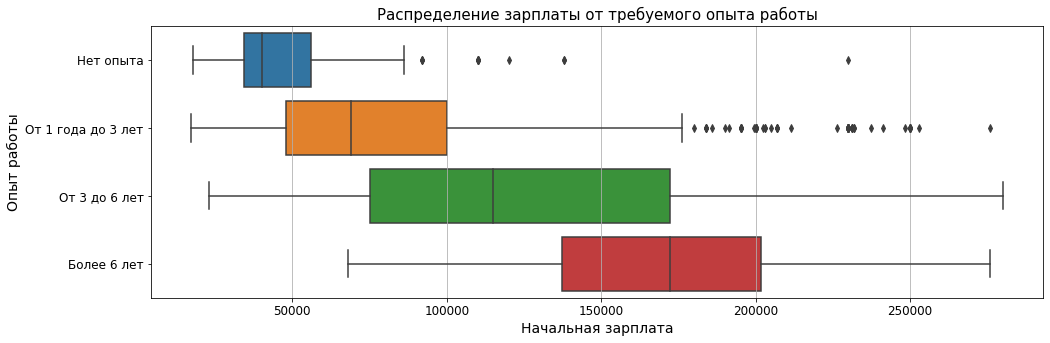

In [40]:
# заполним пропуски как 'Нет опыта'
dfp.experience_name.fillna('Нет опыта', inplace=True)
sort_names = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(y='experience_name', x='salary_min', data=dfp, order=sort_names, ax=ax)
plt.title('Распределение зарплаты от требуемого опыта работы')
plt.xlabel('Начальная зарплата')
plt.ylabel('Опыт работы')
plt.grid(axis='x')
plt.show()

По графику видим, что медианная зарплата и весь двухквартильный размах укладывается в постулат "чем больше опыт работы - тем выше зарплата". Но выбросы показывают, что есть отдельные случаи высоких зарплат независимо от опыты работы.
### Проанализируем взаимосвязь между категориальными колонками:
#### Специальностями и требуемым опытом работы

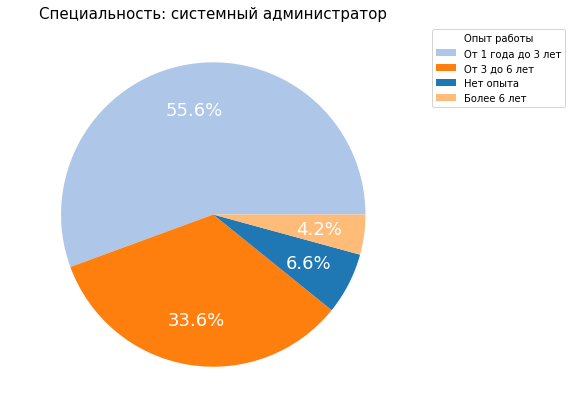

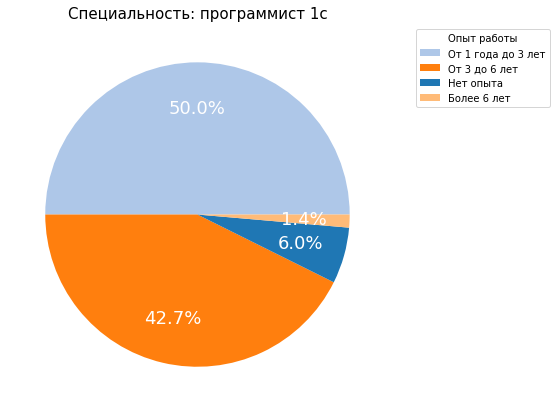

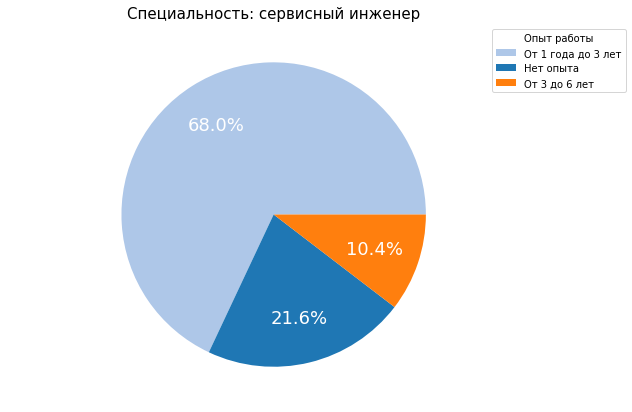

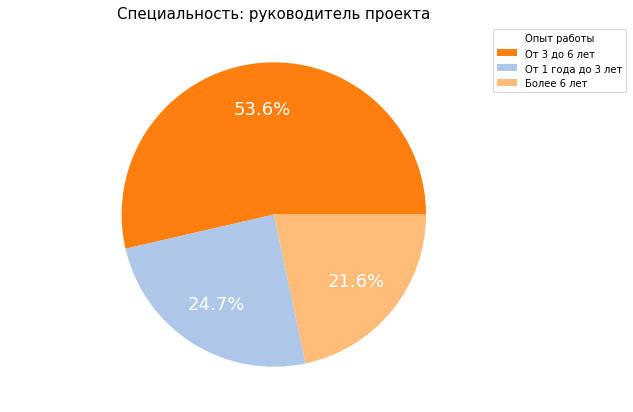

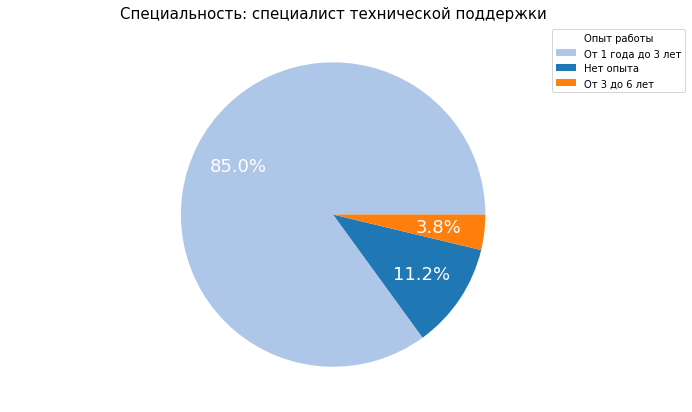

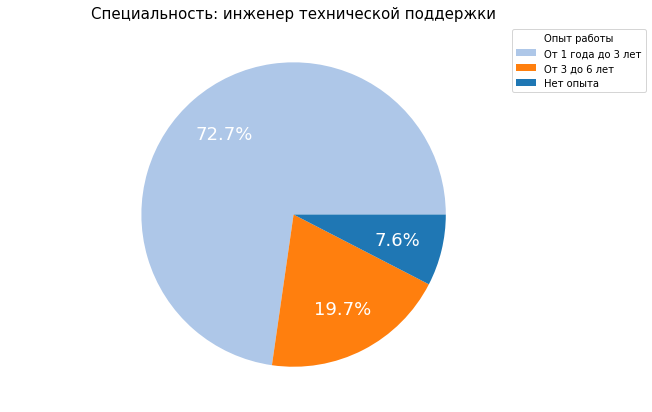

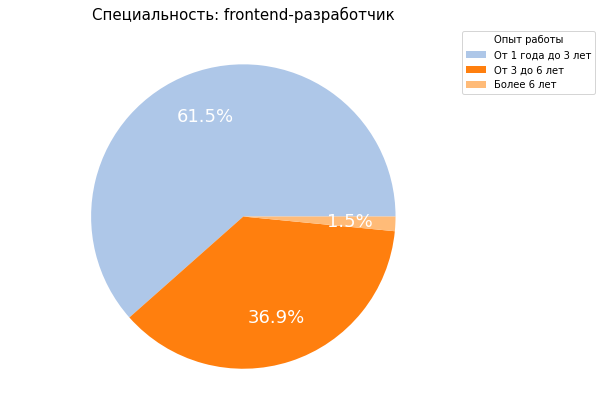

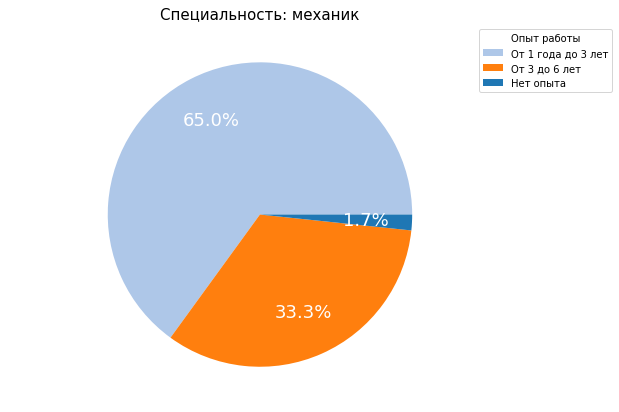

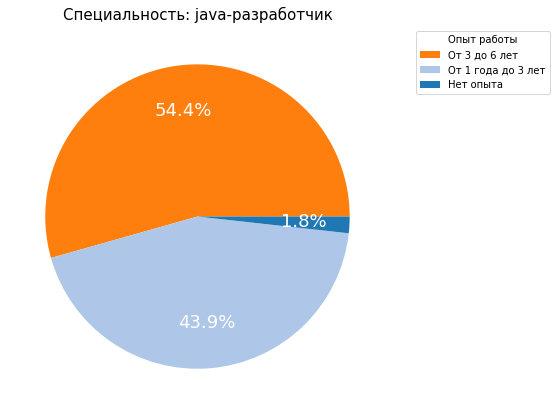

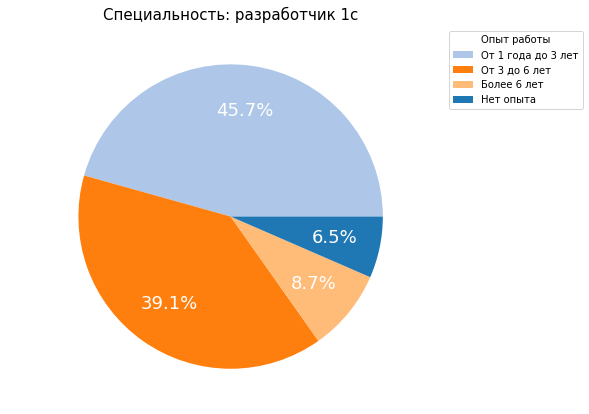

In [41]:
colors = dict(zip(sort_names, plt.cm.tab20.colors[:len(sort_names)]))

for name in names:
    ncounts = dfp[dfp['name_part1'] == name]['experience_name'].value_counts()
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 7))
    plt.title(f'Специальность: {name}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.7
                            )
    plt.legend(patches, labels, title="Опыт работы", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что по специальностям примерно сохраняется соотношение между градациями по опыту работы.

In [42]:
skill_names = dfp_sk['key_skills'].value_counts()[:20].index
skill_names

Index(['1с', 'sql', 'linux', 'git', 'python', 'английский язык', 'postgresql',
       'java', 'управление проектами', 'работа в команде', 'javascript',
       'техническое обслуживание', 'ms sql', 'информационные технологии',
       '1с программирование', 'информационная безопасность', 'docker',
       'настройка пк', 'грамотная речь', 'c#'],
      dtype='object')

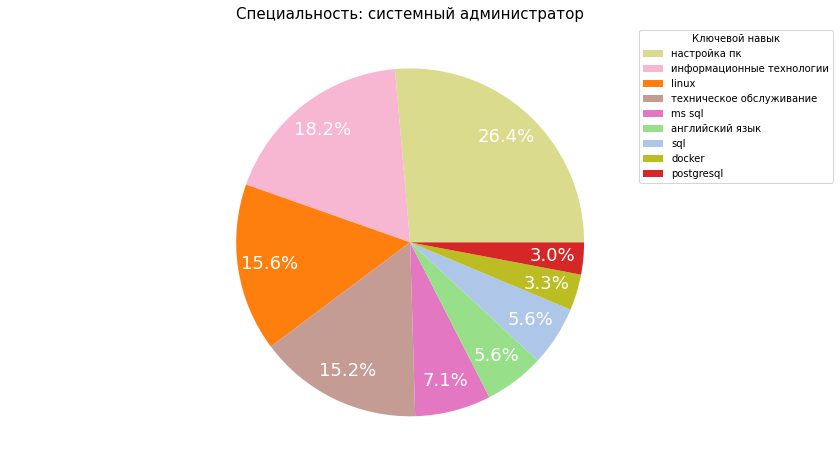

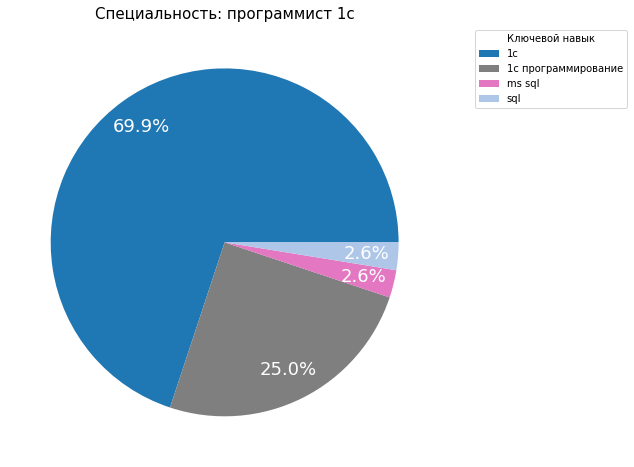

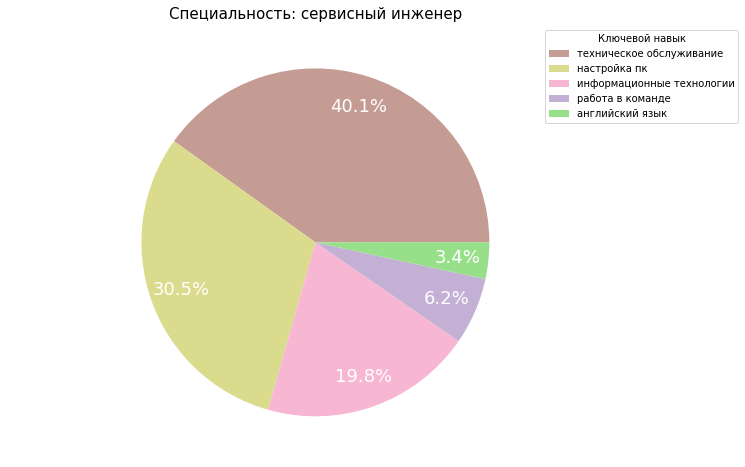

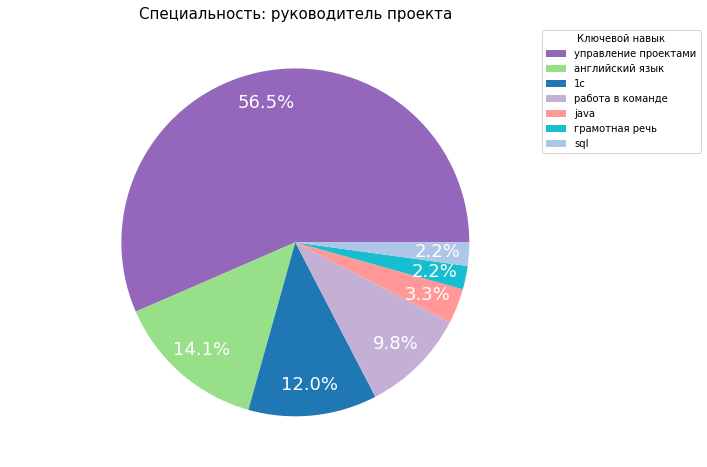

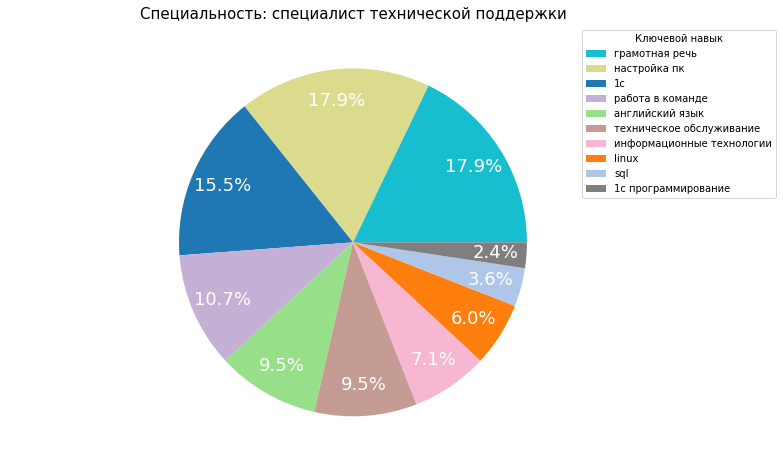

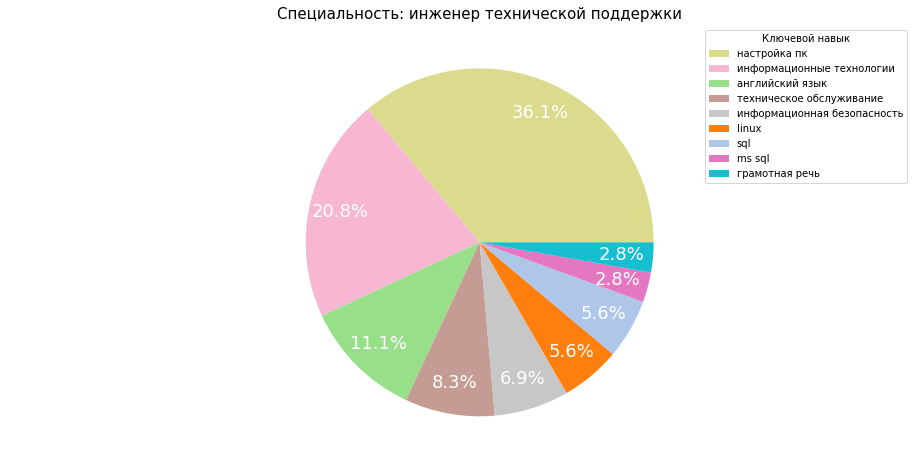

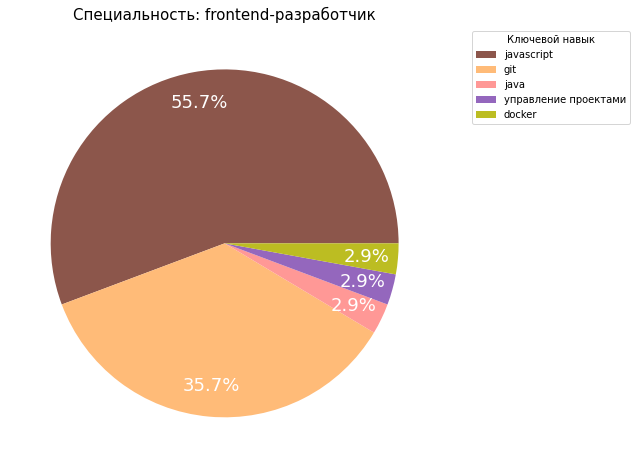

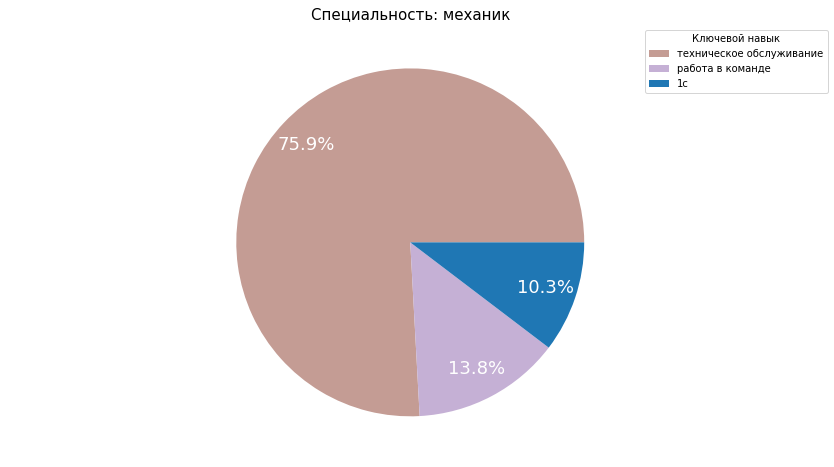

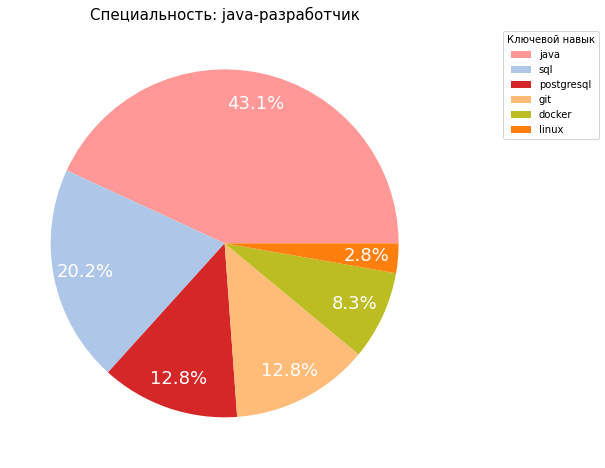

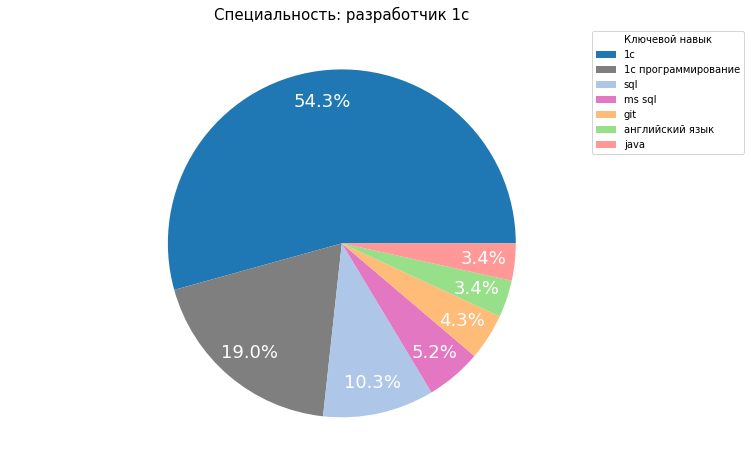

In [43]:
def flt_values_to_df(dts, col_name):
    return pd.DataFrame(pd.core.common.flatten(dts[col_name].dropna().tolist()), columns=[col_name])

colors = dict(zip(skill_names, plt.cm.tab20.colors[:len(skill_names)]))
for name in names:
    col_name = 'key_skills_name'
    df_en = flt_values_to_df(dfp[dfp['name_part1'] == name], col_name)
    df_en = df_en[df_en[col_name].isin(skill_names)]
    ncounts = df_en[col_name].value_counts()
    # уберем значения менее 2%
    ncounts = ncounts[ncounts.values > ncounts.sum()/100*2]
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'Специальность: {name}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.82
                            )
    plt.legend(patches, labels, title="Ключевой навык", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что для каждой специальности свой набор основных ключевых навыков.